<a href="https://colab.research.google.com/github/MateoGlz/Progra-Analitica-Descriptica-Predictiva/blob/main/24_Avances_proyecto_Mateo_Gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No se encontro un concepto que sirviera para las necesidades del proyecto entonces aplique solo un cambio de 'label' por 'cultivo' y un modelo para ver que cambios necesitada hacer o si asie staba bien debido a que no podia quitar campos, por ejemplo el ph era el menos influyente pero en la agricultura si todas las demas variables son iguales pero con un ph diferente esto genera otro campo. El modelo implementado para clasificar cultivos es Random Forest.

In [2]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

path_stress = kagglehub.dataset_download("aksahaha/crop-recommendation")
print("📂 Path del dataset:", path_stress)

print("\n📁 Archivos encontrados:")
for root, dirs, files in os.walk(path_stress):
    for file in files:
        full_path = os.path.join(root, file)
        print(f"  - {file} (Tamaño: {os.path.getsize(full_path)} bytes)")

print("\n📄 Archivos en directorio principal:")
all_files = os.listdir(path_stress)
for file in all_files:
    file_path = os.path.join(path_stress, file)
    if os.path.isfile(file_path):
        print(f"  - {file}")




csv_path = os.path.join(path_stress, 'Crop_recommendation.csv')

df = pd.read_csv(csv_path)
df.head()

100%|██████████| 62.6k/62.6k [00:00<00:00, 31.1MB/s]

Extracting files...
📂 Path del dataset: /root/.cache/kagglehub/datasets/aksahaha/crop-recommendation/versions/1

📁 Archivos encontrados:
  - Crop_recommendation.csv (Tamaño: 149263 bytes)

📄 Archivos en directorio principal:
  - Crop_recommendation.csv


,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [3]:
df = df.rename(columns={'label': 'cultivo'})

=== ANÁLISIS DETALLADO RANDOM FOREST ===
 Accuracy: 0.9932

=== ANÁLISIS DE CONFIANZA ===


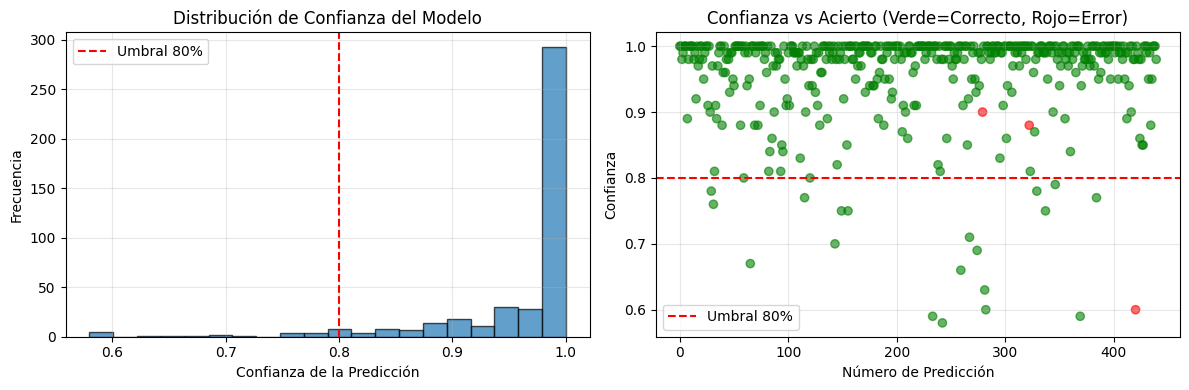


=== ANÁLISIS DE ERRORES ===
 3 ERRORES ENCONTRADOS:
          Real Predicho  Confianza  Correcto
65        rice     jute       0.90     False
13        rice     jute       0.88     False
588  mothbeans   lentil       0.60     False

 CONFIANZA PROMEDIO:
   Aciertos: 0.958
   Errores:  0.793

=== MATRIZ DE CONFUSIÓN ===


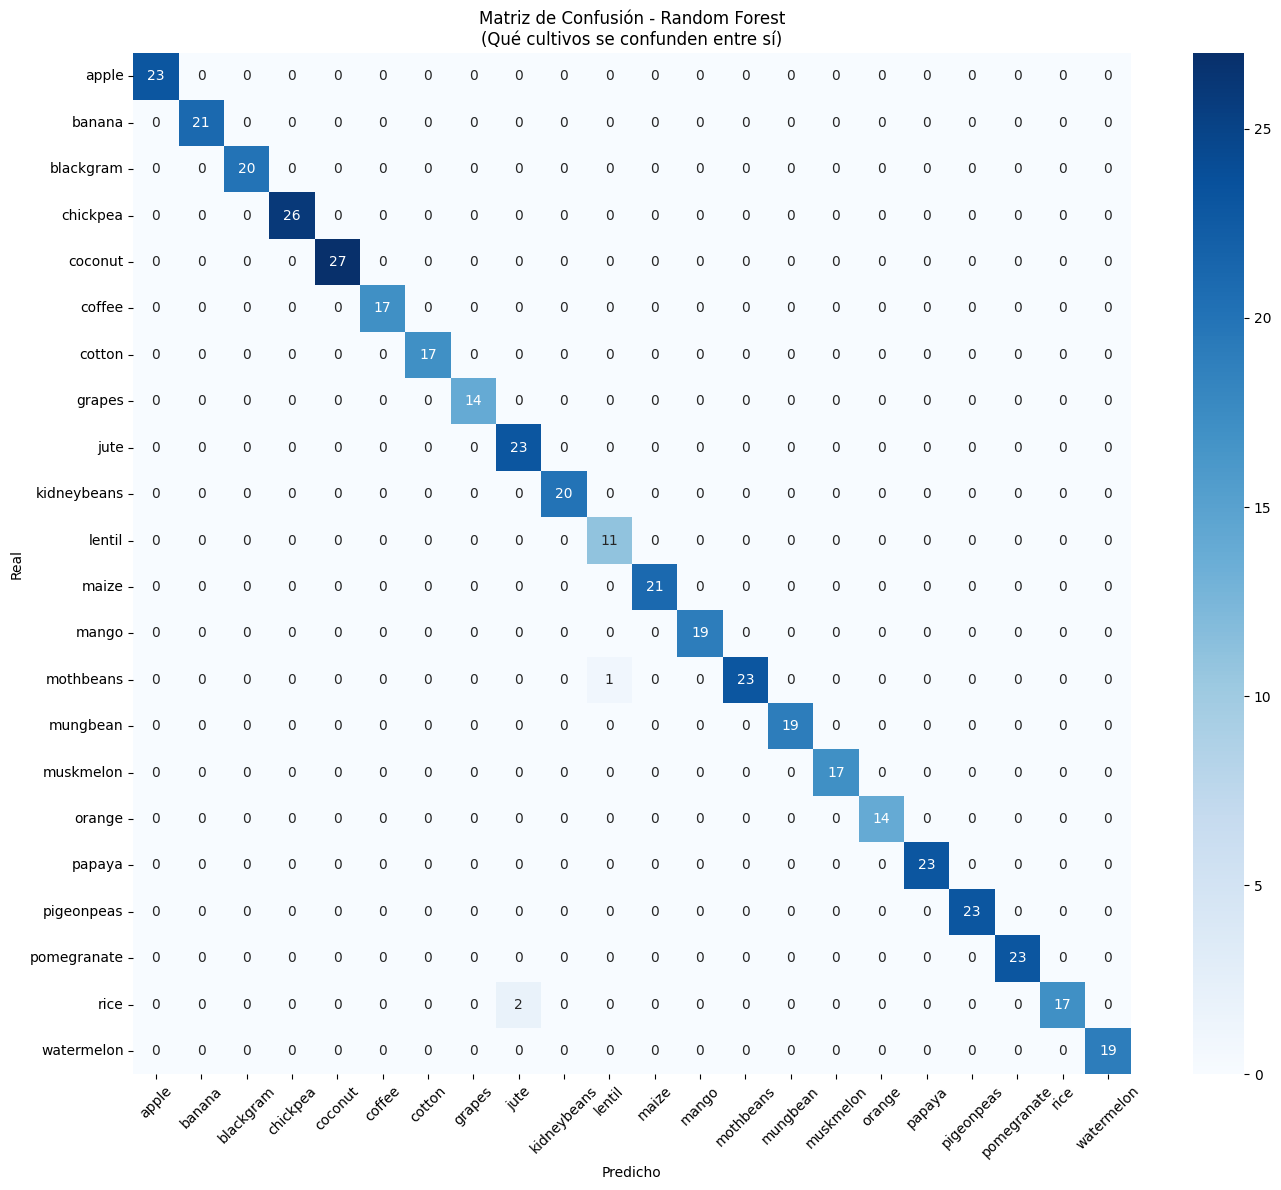


=== IMPORTANCIA DE VARIABLES CON INCERTIDUMBRE ===
Importancia promedio ± desviación estándar:
                 mean       std
rainfall     0.232592  0.058868
humidity     0.216898  0.047112
potassium    0.180307  0.058090
phosphorus   0.142119  0.047534
Nitrogen     0.108859  0.039468
temperature  0.072136  0.032934
ph           0.047088  0.024721
Unnamed: 8   0.000000  0.000000
Unnamed: 9   0.000000  0.000000


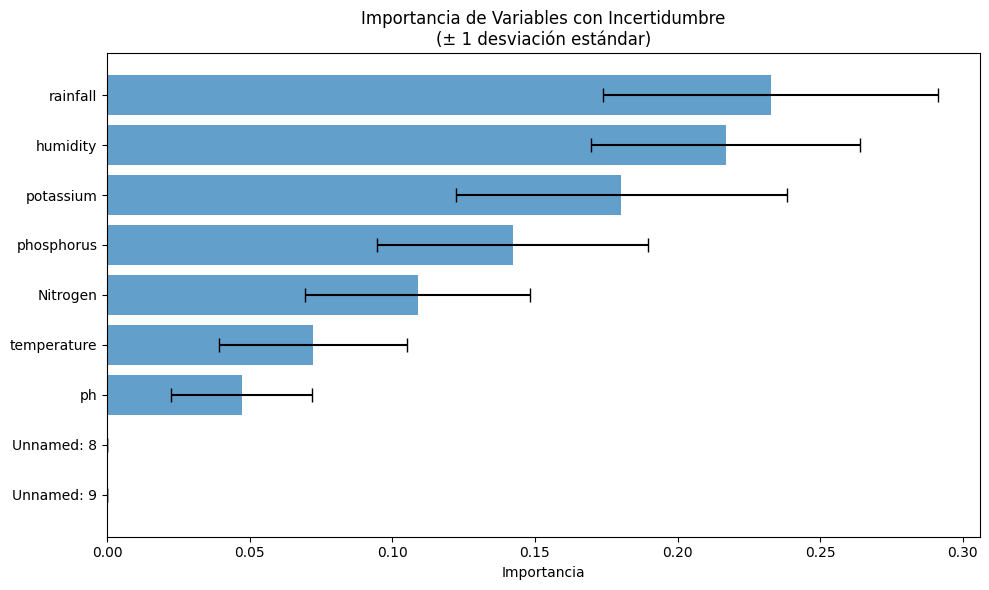


 RESUMEN EJECUTIVO - DIAGNÓSTICO DEL MODELO
 Accuracy: 0.9932 (99.3%)
 Cultivos: 22
 Variable más importante: rainfall
 Errores: 3 de 440
 Confianza promedio en errores: 0.793
 Cultivos con más errores: ['rice', 'mothbeans']


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. PREPARAR DATOS
print("=== ANÁLISIS DETALLADO RANDOM FOREST ===")
X = df.drop('cultivo', axis=1)
y = df['cultivo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. ENTRENAR RANDOM FOREST
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. PREDICCIONES Y PROBABILIDADES
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)  # Probabilidades de cada clase

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")

# 4. ANÁLISIS DE CONFIANZA DEL MODELO
print("\n=== ANÁLISIS DE CONFIANZA ===")
# Probabilidad máxima para cada predicción
confianza_predicciones = np.max(y_proba, axis=1)

plt.figure(figsize=(12, 4))

# Gráfico 1: Confianza de las predicciones
plt.subplot(1, 2, 1)
plt.hist(confianza_predicciones, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(x=0.8, color='red', linestyle='--', label='Umbral 80%')
plt.xlabel('Confianza de la Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de Confianza del Modelo')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Confianza vs Acierto (similar a residuos vs predicciones)
plt.subplot(1, 2, 2)
aciertos = (y_pred == y_test)
colores = ['red' if not acierto else 'green' for acierto in aciertos]

plt.scatter(range(len(confianza_predicciones)), confianza_predicciones,
            c=colores, alpha=0.6)
plt.axhline(y=0.8, color='red', linestyle='--', label='Umbral 80%')
plt.xlabel('Número de Predicción')
plt.ylabel('Confianza')
plt.title('Confianza vs Acierto (Verde=Correcto, Rojo=Error)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ANÁLISIS DE ERRORES (similar a análisis de residuos)
print("\n=== ANÁLISIS DE ERRORES ===")
resultados = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred,
    'Confianza': confianza_predicciones,
    'Correcto': y_pred == y_test
})

errores = resultados[resultados['Correcto'] == False]

if len(errores) > 0:
    print(f" {len(errores)} ERRORES ENCONTRADOS:")
    print(errores.sort_values('Confianza', ascending=False))

    # Análisis de confianza en errores vs aciertos
    print(f"\n CONFIANZA PROMEDIO:")
    print(f"   Aciertos: {resultados[resultados['Correcto']==True]['Confianza'].mean():.3f}")
    print(f"   Errores:  {resultados[resultados['Correcto']==False]['Confianza'].mean():.3f}")
else:
    print(" ¡TODAS las predicciones son correctas!")

# 6. MATRIZ DE CONFUSIÓN DETALLADA
print("\n=== MATRIZ DE CONFUSIÓN ===")
cultivos_ordenados = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=cultivos_ordenados)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cultivos_ordenados,
            yticklabels=cultivos_ordenados)
plt.title('Matriz de Confusión - Random Forest\n(Qué cultivos se confunden entre sí)')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. IMPORTANCIA DE VARIABLES CON INTERVALOS DE CONFIANZA
print("\n=== IMPORTANCIA DE VARIABLES CON INCERTIDUMBRE ===")
importancias = []
for arbol in rf_model.estimators_:
    importancias.append(arbol.feature_importances_)

importancias_df = pd.DataFrame(importancias, columns=X.columns)
importancias_stats = importancias_df.agg(['mean', 'std']).T
importancias_stats = importancias_stats.sort_values('mean', ascending=False)

print("Importancia promedio ± desviación estándar:")
print(importancias_stats)

# Gráfico de importancia con barras de error
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(importancias_stats))
plt.barh(y_pos, importancias_stats['mean'], xerr=importancias_stats['std'],
         alpha=0.7, capsize=5)
plt.yticks(y_pos, importancias_stats.index)
plt.xlabel('Importancia')
plt.title('Importancia de Variables con Incertidumbre\n(± 1 desviación estándar)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 8. RESUMEN EJECUTIVO
print("\n" + "="*50)
print(" RESUMEN EJECUTIVO - DIAGNÓSTICO DEL MODELO")
print("="*50)
print(f" Accuracy: {accuracy:.4f} ({accuracy*100:.1f}%)")
print(f" Cultivos: {len(y.unique())}")
print(f" Variable más importante: {importancias_stats.index[0]}")
print(f" Errores: {len(errores)} de {len(y_test)}")

if len(errores) > 0:
    print(f" Confianza promedio en errores: {errores['Confianza'].mean():.3f}")
    print(f" Cultivos con más errores: {errores['Real'].value_counts().index.tolist()[:3]}")